# 第4章: 形態素解析
>夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．
>
>なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [2]:
!mecab ../data/neko.txt -o ../data/neko.txt.mecab

/bin/bash: line 1: mecab: command not found


### 30. 形態素解析結果の読み込み
>形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
import pandas as pd
from my_functions import divide_conquer_split

df_waganeko = pd.read_table("../data/neko.txt.mecab", sep=r"\t|,", usecols=[0,1,2,7], names=["surface", "pos", "pos1", "base"], engine='python')
list_idx_eos = df_waganeko[df_waganeko["surface"] == "EOS"].index.tolist()
list_sentence = divide_conquer_split(df_waganeko, list_idx_eos)

### 31. 動詞
>動詞の表層形をすべて抽出せよ．

In [7]:
waganeko_verbs = df_waganeko[df_waganeko["pos"] == "動詞"]
waganeko_verbs["surface"]

26        生れ
32        つか
41         し
46        泣い
52         し
          ..
226230    死ん
226235    得る
226241    死な
226244     得
226245    られ
Name: surface, Length: 28901, dtype: object

### 32. 動詞の基本形
> 動詞の基本形をすべて抽出せよ

In [12]:
waganeko_verbs["base"]

26        生れる
32         つく
41         する
46         泣く
52         する
         ... 
226230     死ぬ
226235     得る
226241     死ぬ
226244     得る
226245    られる
Name: base, Length: 28901, dtype: object

### 33. 「AのB」
> 2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [13]:
df_waganeko

,surface,pos,pos1,base
0,一,名詞,数,一
1,記号,一般,*,None
2,EOS,None,None,None
3,記号,一般,*,None
4,EOS,None,None,None
...,...,...,...,...
226257,。,記号,句点,。
226258,記号,一般,*,None
226259,EOS,None,None,None
226260,記号,一般,*,None


### 34. 名詞の連接
>名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

### 35. 単語の出現頻度
> 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [56]:
# 前処理 (ごり押し)
waganeko_words = df_waganeko[(df_waganeko["surface"]!="記号") & (df_waganeko["surface"]!="EOS")]
waganeko_words = waganeko_words[(waganeko_words["pos"]!="記号") & (waganeko_words["pos"]!="フィラー") & (waganeko_words["pos"]!="空白") & (waganeko_words["pos"]!="その他")]

word_frequency = waganeko_words["surface"].value_counts()
word_frequency

surface
の       9193
て       6868
は       6421
に       6242
を       6071
        ... 
悔やん        1
墓場         1
切り落し       1
ぎりご        1
拷問         1
Name: count, Length: 13553, dtype: int64

### 36. 頻度上位10語
> 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<Axes: >

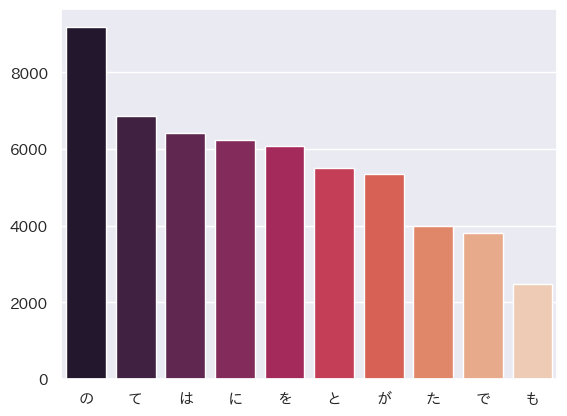

In [77]:
import japanize_matplotlib
import seaborn as sns

# c.f. https://www.data-green.jp/part_of_speech/
top10 = word_frequency.head(10)
x = top10.index.to_list()
y = top10.values.tolist()
sns.barplot(x=x, y=y, hue=x, palette="rocket")

### 37. 「猫」と共起頻度の高い上位10語
> 「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

### 38. ヒストグラム
> 単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

### 39. Zipfの法則
>単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．